In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
# Load the data 
data_path = '../src/data/telecom_users_data_source.csv' 
df = pd.read_csv(data_path)

In [7]:
# Check the shape of the data 
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (150001, 55)


In [8]:
# Get a summary of the data 
print("\nSummary of the DataFrame:") 
df.info()


Summary of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object

In [10]:
# Inspect the data 
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [9]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')

Number of duplicate rows: 0


In [10]:
# Identify columns with unique values
unique_columns = [col for col in df.columns if df[col].nunique() == len(df)]

# Display the columns with unique values
print("Columns with unique values:")
print(unique_columns)

Columns with unique values:
[]


In [7]:
# Check for duplicate values in 'Bearer Id' 
duplicate_bearer_ids = df['Bearer Id'].duplicated().sum() 
print(f"Number of duplicate 'Bearer Id' values: {duplicate_bearer_ids}")

Number of duplicate 'Bearer Id' values: 15292


In [11]:
# Identify duplicate rows based on 'Bearer Id'
duplicate_rows = df[df.duplicated(subset='Bearer Id', keep=False)]
print(f"Number of duplicate 'Bearer Id' values: {duplicate_rows.shape[0]}")
duplicate_rows.head()

Number of duplicate 'Bearer Id' values: 27041


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
20,1.304243e+19,4/17/2019 0:35,363.0,4/25/2019 4:52,691.0,706649.0,2.082010e+14,3.365875e+10,8.654080e+13,T29714B,...,15782415.0,9688165.0,18625220.0,14679856.0,373953102.0,574875.0,161357015.0,134689.0,26026033.0,422406937.0
30,1.304243e+19,4/18/2019 0:35,711.0,4/25/2019 4:52,691.0,620248.0,2.082010e+14,3.365875e+10,8.654080e+13,T29714B,...,1843883.0,15098966.0,12173853.0,10598373.0,366103099.0,13276512.0,195717525.0,14209340.0,55015623.0,386320481.0
43,1.304243e+19,4/19/2019 2:55,809.0,4/25/2019 0:17,262.0,508961.0,2.082018e+14,3.376353e+10,8.637690e+13,D72939C,...,12768206.0,11205276.0,10818260.0,6970736.0,363762694.0,5186208.0,767346215.0,11242030.0,35473940.0,396196374.0
50,1.304243e+19,4/20/2019 2:55,691.0,4/25/2019 0:17,262.0,422560.0,2.082018e+14,3.376353e+10,8.637690e+13,D72939C,...,16006629.0,19493910.0,12084616.0,4858682.0,649474879.0,4900228.0,727173102.0,6679677.0,39034473.0,685149296.0
58,7.277826e+18,4/20/2019 14:08,136.0,4/25/2019 0:54,79.0,384341.0,2.082095e+14,3.366913e+10,3.540531e+13,T86956A,...,7758278.0,2690075.0,4193579.0,7356758.0,551768053.0,2333567.0,4652246.0,9798236.0,26252398.0,572918026.0


In [16]:
# Set display options to show full 'Bearer Id' values
pd.set_option('display.float_format', '{:.0f}'.format)
# Count the occurrences of each 'Bearer Id' and sort them in descending order
duplicate_counts = duplicate_rows['Bearer Id'].value_counts().sort_values(ascending=False)
duplicate_counts.head()

Bearer Id
13042425979269199872    16
13042425965944199168    10
13042425974582800384     9
13042425978774599680     9
13042425981873399808     9
Name: count, dtype: int64

In [20]:
# Filter the data for the specified 'Bearer Id'
bearer_id_data = df[df['Bearer Id'] == 13042425979269199872]
bearer_id_data.head(16)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
148348,13042425979269199872,4/29/2019 7:08,528,4/30/2019 7:08,502,86399,208201771673043,33665253343,86376903244334,D21804B,...,11898112,21917542,3005035,12474762,390319523,7490660,221656369,1902765,46006163,417305084
148349,13042425979269199872,4/29/2019 7:08,842,4/30/2019 3:14,71,72349,208201715928119,33658392032,86376903262856,T85693C,...,15644823,11695112,10488944,10495064,7977922,13796403,369021000,7750744,44572412,45004338
148350,13042425979269199872,4/29/2019 7:08,856,4/30/2019 7:08,857,86400,208201771681091,33664851928,86376903224128,T21804B,...,22725257,21407630,4665910,20076227,437147283,3207981,448460847,11509524,58021839,477524790
148352,13042425979269199872,4/29/2019 7:08,987,4/30/2019 1:08,73,64803,208201715270061,33664272475,86376903256987,9.16456699544422E+015,...,12852519,5844462,1930585,21405390,507145590,2402492,593990048,9929439,43703595,529146115
148353,13042425979269199872,4/29/2019 7:08,58,4/30/2019 7:08,24,86399,208201401963217,33761684743,86376903489239,9.16456699544422E+015,...,3262928,13087878,2029882,12802274,174357604,3627547,792574595,8797429,42972505,184134466
148354,13042425979269199872,4/29/2019 7:08,95,4/30/2019 7:08,48,86399,208201908225048,33661634040,86376903280498,T85756A,...,7094407,15631364,14445222,10192102,89081195,12604754,674430795,15519106,57429716,113213196
148355,13042425979269199872,4/29/2019 7:08,115,4/30/2019 7:08,1,86399,208201771755039,33762182417,86376903490002,T85711A,...,5901580,3293273,3565013,17081443,472010328,10868322,699622313,4412976,40133716,495448758
148356,13042425979269199872,4/29/2019 7:08,119,4/30/2019 7:08,958,86399,208201715270065,33665156818,86376903258534,9.16456699544422E+015,...,10710865,3784700,16556957,9916309,46800240,10349362,659016442,2982205,28316927,78489273
148358,13042425979269199872,4/29/2019 7:08,233,4/30/2019 7:08,239,86400,208201908225052,33667544392,86376903260072,T85713A,...,22483911,15320958,16209637,16140343,551232709,15199409,532549093,12015720,61847053,594166539
148359,13042425979269199872,4/29/2019 7:08,248,4/30/2019 7:08,208,86399,208201401951005,33669156160,86376903482126,T85713B,...,4679867,20549288,7150333,19695300,397284051,4579066,329851993,11505030,59572655,419875450


In [1]:
# Check for duplicate values in 'MSISDN/Number'
duplicate_msisdn = df['MSISDN/Number'].duplicated().sum()
print(f"Number of duplicate 'MSISDN/Number' values: {duplicate_msisdn}")

# Identify duplicate rows based on 'MSISDN/Number'
duplicate_rows = df[df.duplicated(subset='MSISDN/Number', keep=False)]
print(f"Number of duplicate 'MSISDN/Number' rows: {duplicate_rows.shape[0]}")
duplicate_rows.head()

Number of duplicate 'MSISDN/Number' values: 42245
Number of duplicate 'MSISDN/Number' rows: 70974


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.31144834608449e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,208201448079117.0,33664962239.0,35521209507511.0,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.31144834828789e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,208201909211140.0,33681854413.0,35794009006359.0,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
5,1.31144834997792e+19,4/12/2019 21:37,439.0,4/25/2019 8:08,553.0,1074638.0,208201402670191.0,33668185951.0,35298410295700.0,T89132C,...,21332918.0,2611113.0,7345361.0,6536448.0,710293538.0,13167974.0,654978277.0,4436057.0,30307754.0,754452212.0
7,1.30424259108654e+19,4/14/2019 2:11,592.0,4/25/2019 2:26,512.0,951292.0,208201009069207.0,33763490140.0,86546404964017.0,CELL_208_20_520025_1,...,12189786.0,19735183.0,6858496.0,12075206.0,748906189.0,16149622.0,537601820.0,7714657.0,58813016.0,775350343.0
9,1.30424259146693e+19,4/15/2019 0:32,0.0,4/25/2019 0:40,284.0,864482.0,208200314385130.0,33659219748.0,35573109931422.0,L20434C,...,16338345.0,6573194.0,12211149.0,974201.0,811355188.0,1591237.0,64856042.0,12815208.0,22417975.0,850570347.0


In [2]:
import pandas as pd

# Load the cleaned data
data_path = '../src/data/cleaned_telecom_users_data.csv'
df = pd.read_csv(data_path)

# Check for duplicate values in 'IMEI'
duplicate_imei = df['IMEI'].duplicated().sum()
print(f"Number of duplicate 'IMEI' values: {duplicate_imei}")

# Identify duplicate rows based on 'IMEI'
duplicate_rows_imei = df[df.duplicated(subset='IMEI', keep=False)]
print(f"Number of duplicate 'IMEI' rows: {duplicate_rows_imei.shape[0]}")
duplicate_rows_imei.head()

Number of duplicate 'IMEI' values: 41833
Number of duplicate 'IMEI' rows: 70605


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.31144834608449e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,208201448079117.0,33664962239.0,35521209507511.0,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.31144834828789e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,208201909211140.0,33681854413.0,35794009006359.0,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
5,1.31144834997792e+19,4/12/2019 21:37,439.0,4/25/2019 8:08,553.0,1074638.0,208201402670191.0,33668185951.0,35298410295700.0,T89132C,...,21332918.0,2611113.0,7345361.0,6536448.0,710293538.0,13167974.0,654978277.0,4436057.0,30307754.0,754452212.0
7,1.30424259108654e+19,4/14/2019 2:11,592.0,4/25/2019 2:26,512.0,951292.0,208201009069207.0,33763490140.0,86546404964017.0,CELL_208_20_520025_1,...,12189786.0,19735183.0,6858496.0,12075206.0,748906189.0,16149622.0,537601820.0,7714657.0,58813016.0,775350343.0
9,1.30424259146693e+19,4/15/2019 0:32,0.0,4/25/2019 0:40,284.0,864482.0,208200314385130.0,33659219748.0,35573109931422.0,L20434C,...,16338345.0,6573194.0,12211149.0,974201.0,811355188.0,1591237.0,64856042.0,12815208.0,22417975.0,850570347.0


In [12]:
# Identify columns with high cardinality 
high_cardinality_columns = [col for col in df.columns if df[col].nunique() > len(df) * 0.9] 
print("Columns with high cardinality (potential unique identifiers):") 
print(high_cardinality_columns)

Columns with high cardinality (potential unique identifiers):
['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)']


In [13]:
# Check for missing values in high cardinality columns 
missing_values_high_cardinality = df[high_cardinality_columns].isnull().sum() 
print("Missing values in high cardinality columns:") 
print(missing_values_high_cardinality)

Missing values in high cardinality columns:
Social Media DL (Bytes)    0
Google DL (Bytes)          0
Google UL (Bytes)          0
Email DL (Bytes)           0
Email UL (Bytes)           0
Youtube DL (Bytes)         0
Youtube UL (Bytes)         0
Netflix DL (Bytes)         0
Netflix UL (Bytes)         0
Gaming DL (Bytes)          0
Gaming UL (Bytes)          0
Other DL (Bytes)           0
Other UL (Bytes)           0
Total UL (Bytes)           1
Total DL (Bytes)           1
dtype: int64


#### Handling the missing Values

In [5]:
# Check for missing values 
missing_values = df.isnull().sum() 
missing_values

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [6]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Filter columns with missing values
missing_percentage = missing_percentage[missing_percentage > 0]

# Display the columns with their missing value percentages
missing_percentage


Bearer Id                                    0.660662
Start                                        0.000667
Start ms                                     0.000667
End                                          0.000667
End ms                                       0.000667
Dur. (ms)                                    0.000667
IMSI                                         0.379997
MSISDN/Number                                0.710662
IMEI                                         0.381331
Last Location Name                           0.768662
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Avg Bearer TP DL (kbps)                      0.000667
Avg Bearer TP UL (kbps)                      0.000667
TCP DL Retrans. Vol (Bytes)                 58.763608
TCP UL Retrans. Vol (Bytes)                 64.432237
DL TP < 50 Kbps (%)                          0.502663
50 Kbps < DL TP < 250 Kbps (%)               0.502663
250 Kbps < DL TP < 1 Mbps (%

In [16]:
# Remove columns with high missing values (more than 50%)
high_missing_cols = [
    'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Nb of sec with 125000B < Vol DL', 
    'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 
    'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 
    'Nb of sec with 6250B < Vol UL < 37500B'
]
df.drop(columns=high_missing_cols, inplace=True)

In [17]:
# Remove Avg RTT DL (ms), Avg RTT UL (ms), TCP DL Retrans. Vol (Bytes), and TCP UL Retrans. Vol (Bytes) for Task 1 and Task 2
df.drop(columns=['Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)'], inplace=True)

In [3]:
# Remove rows with missing values for specified columns 
remove_missing_cols = [ 
    'Dur. (ms)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'Start', 'Start ms', 'End', 'End ms', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B' ] 
df.dropna(subset=remove_missing_cols, inplace=True)

In [21]:
# Placeholder Imputation for Last Location Name and Unique Identifiers 
placeholder_impute_cols = { 
    'Last Location Name': 'missing_last_location', 
    'Bearer Id': 'missing_bearer_Id', 
    'IMSI': 'missing_IMSI', 
    'MSISDN/Number': 'missing_MSISDN/Number', 
    'IMEI': 'missing_IMEI' } 
df = df.assign(**{col: df[col].fillna(placeholder) for col, placeholder in placeholder_impute_cols.items()})

In [23]:
# Mode Imputation for Categorical Columns 
categorical_cols = ['Handset Manufacturer', 'Handset Type'] 
df = df.assign(**{col: df[col].fillna(df[col].mode()[0]) for col in categorical_cols})

In [26]:
# Verify that there are no more missing values
missing_values_after = df.isnull().sum()
print(missing_values_after[missing_values_after > 0])

Series([], dtype: int64)


In [35]:
# Check the shape of the data after handled missing values 
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (148454, 43)


#### Handling Outliers

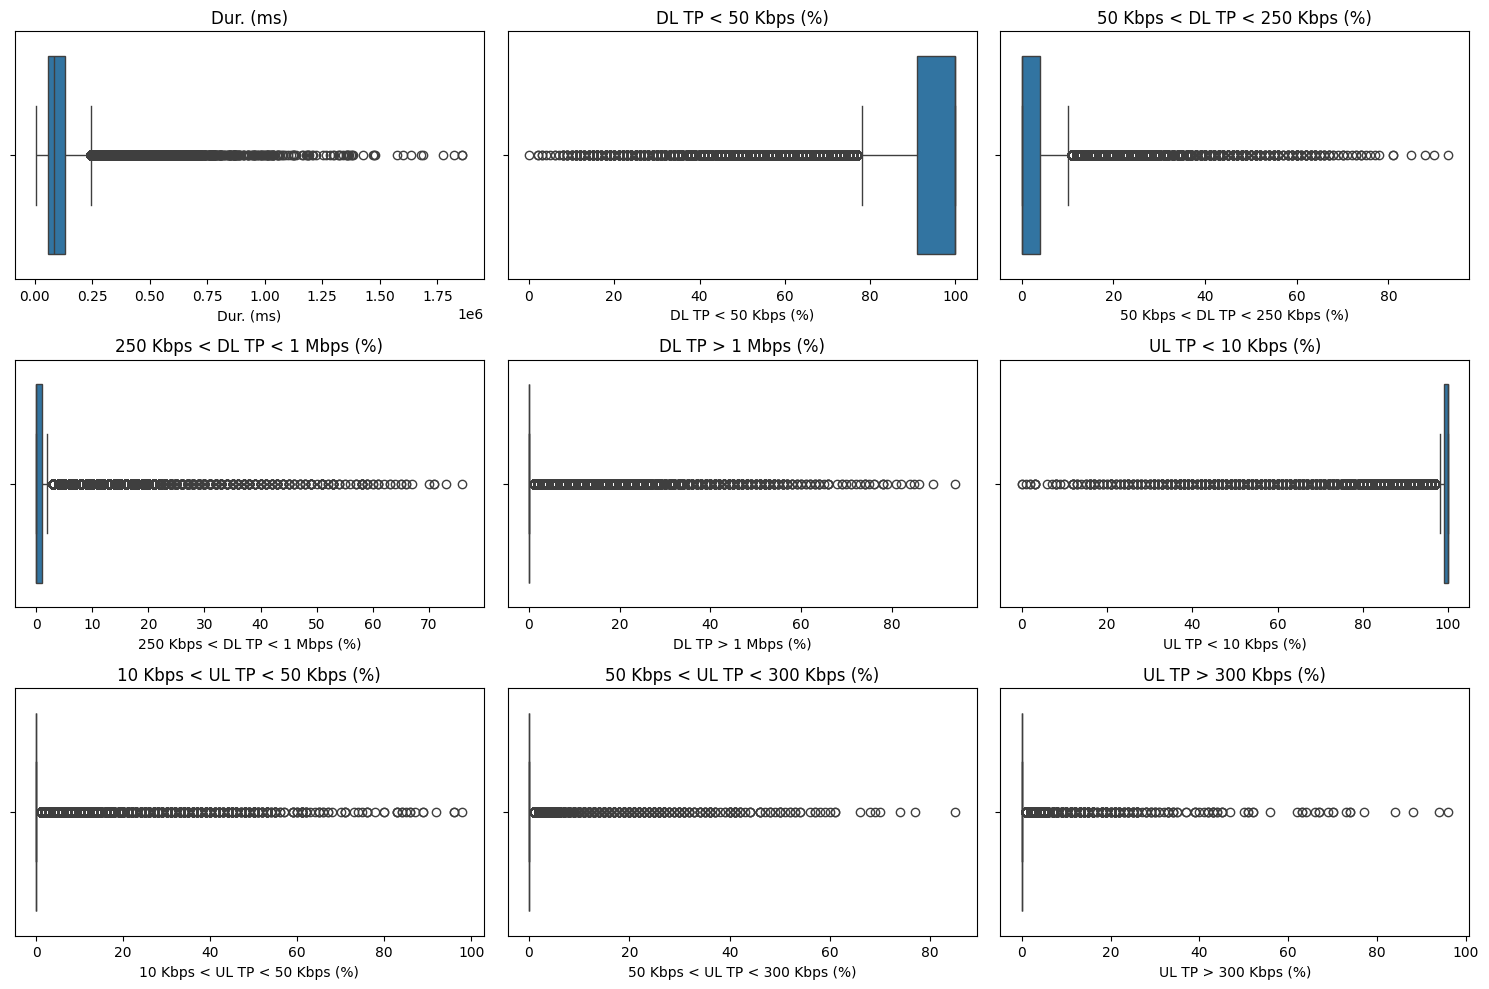

In [32]:
# List of numerical columns to check for outliers
numerical_cols = [
    'Dur. (ms)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', 
    '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', 
    '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)'
]
# Step 1: Visualize the data using box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [34]:
# Step 2: Identify outliers using the IQR method
outliers = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

# Display the number of outliers for each column
for col, outlier_data in outliers.items():
    print(f"{col}: {len(outlier_data)} outliers")

Dur. (ms): 7088 outliers
DL TP < 50 Kbps (%): 18339 outliers
50 Kbps < DL TP < 250 Kbps (%): 15206 outliers
250 Kbps < DL TP < 1 Mbps (%): 29729 outliers
DL TP > 1 Mbps (%): 37046 outliers
UL TP < 10 Kbps (%): 22102 outliers
10 Kbps < UL TP < 50 Kbps (%): 31974 outliers
50 Kbps < UL TP < 300 Kbps (%): 4538 outliers
UL TP > 300 Kbps (%): 2456 outliers


In [36]:
# Save the cleaned data to a CSV file
cleaned_data_path = '../src/data/cleaned_telecom_users_data.csv'
df.to_csv(cleaned_data_path, index=False)
print(f"Cleaned data saved to {cleaned_data_path}")

Cleaned data saved to ../src/data/cleaned_telecom_users_data.csv
